## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## Homework 7: due March 2, 2018

Please enter all answers within this notebook unless otherwise specified. As usual, don't forget to cite sources and collaborators.

Through this problem set, use the SageMath 8.1 kernel except as specified. You may find the following declarations useful:
```
preparser(False)                    # Turn off Sage preparser
import pandas as pd                 # Load pandas
import numpy as np                  # Load numpy
import matplotlib                   # Load matplotlib
import matplotlib.pyplot as plt     # Load pyplot
matplotlib.style.use('ggplot')      # Use R-style plotting in matplotlib
import seaborn as sns               # Load seaborn
```

This homework consists of 5 problems, each of equal value.

In [10]:
preparser(False)                    # Turn off Sage preparser
import pandas as pd                 # Load pandas
import numpy as np                  # Load numpy
import matplotlib                   # Load matplotlib
import matplotlib.pyplot as plt     # Load pyplot
matplotlib.style.use('ggplot')      # Use R-style plotting in matplotlib
import seaborn as sns               # Load seaborn
import statsmodels.api as sm

### Problem 1: Emulation of R in Python

Grading criteria: correctness of code.

Demonstrate Python analogues of the following R code blocks from the previous homework. Hints:
- The Python `statsmodels` module includes the submodule `datasets` which simulates the corresponding R package.
- The R `pairs` function can be simulated using the pandas function `scatter_matrix`.
- The seaborn function `FacetGrid` allows you to set up a grid in which each entry corresponds to a particular value of a conditioning variable. Use this, and the matplotlib scatter plot functionality, to simulate the R function `coplot`.
- The statsmodels module `mosaicplot` can simulate the R function `mosaicplot`.

In [2]:
from statsmodels import datasets
%load_ext rpy2.ipython

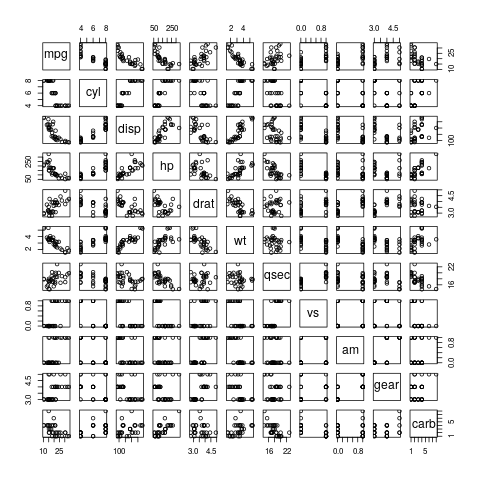

In [3]:
%%R
pairs(mtcars)

In [3]:
mtcars=sm.datasets.get_rdataset('mtcars').data

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/statsmodels/datasets/utils.py:243: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  dataset_meta = index.ix[idx]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7f237e890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa7ec75c850>]], dtype=object)

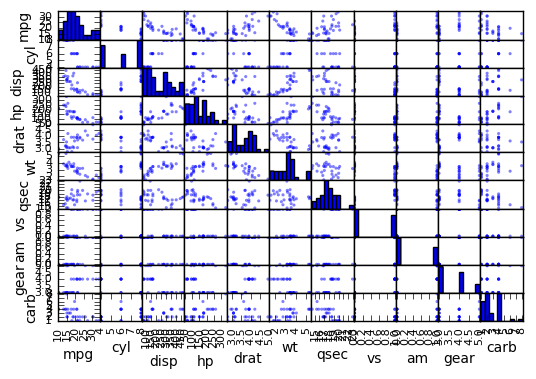

In [4]:
pd.plotting.scatter_matrix(mtcars)

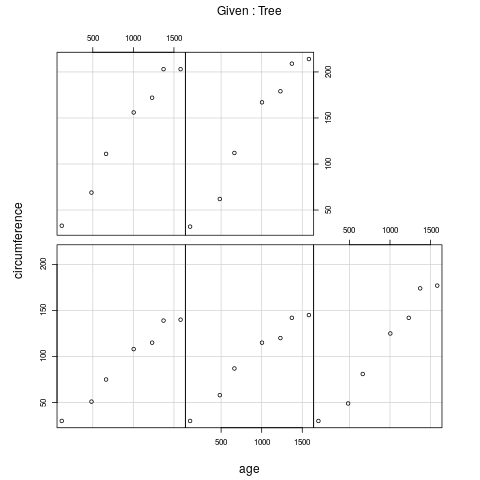

In [5]:
%%R
require(stats); require(graphics)
coplot(circumference ~ age | Tree, data = Orange, show.given = FALSE)

In [7]:
import rpy2.robjects as robjects
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

In [8]:
Orange = pandas2ri.ri2py(r['Orange']) # Convert into a pandas dataframe

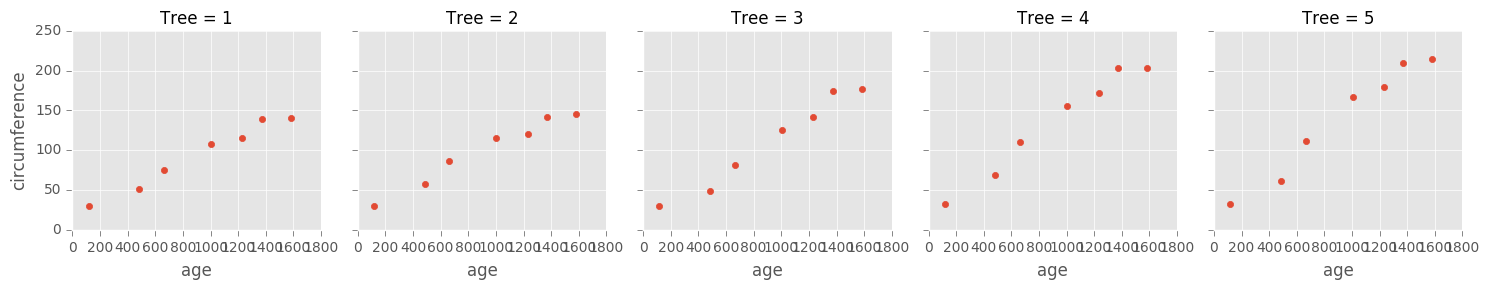

In [16]:
g = sns.FacetGrid(Orange, col='Tree') # Make a different graph for each tree
g.map(plt.scatter, "age", "circumference") # Put a scatter plot in each graph

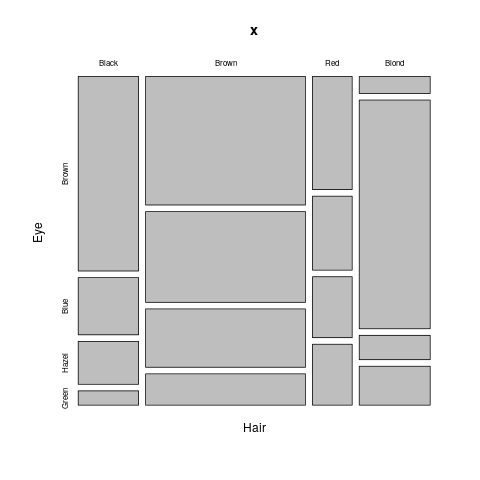

In [17]:
%%R
x <- apply(HairEyeColor, c(1, 2), sum)
x
mosaicplot(x)

In [18]:
HairEyeColor=sm.datasets.get_rdataset('HairEyeColor').data

In [19]:
HEC2=HairEyeColor.groupby(["Hair", "Eye"]).sum()

(<matplotlib.figure.Figure object at 0x7fa7e1030a90>,
 OrderedDict([(('Black', 'Blue'), (0.0, 0.0, 0.17973638663293834, 0.18335166850018333)), (('Black', 'Brown'), (0.0, 0.18665199853318665, 0.17973638663293834, 0.62339567290062325)), (('Black', 'Green'), (0.0, 0.8133480014668133, 0.17973638663293834, 0.045837917125045931)), (('Black', 'Hazel'), (0.0, 0.86248624862486256, 0.17973638663293834, 0.13751375137513747)), (('Blond', 'Blue'), (0.18466249500732257, 0.0, 0.21135667687391826, 0.73282918843065414)), (('Blond', 'Brown'), (0.18466249500732257, 0.73612951846365737, 0.21135667687391826, 0.054572386372495528)), (('Blond', 'Green'), (0.18466249500732257, 0.79400223486915622, 0.21135667687391826, 0.1247368831371326)), (('Blond', 'Hazel'), (0.18466249500732257, 0.92203944803929216, 0.21135667687391826, 0.07796055196070785)), (('Brown', 'Blue'), (0.4009452802556251, 0.0, 0.47596857941685516, 0.29079831060029077)), (('Brown', 'Brown'), (0.4009452802556251, 0.29409864063329411, 0.47596857941

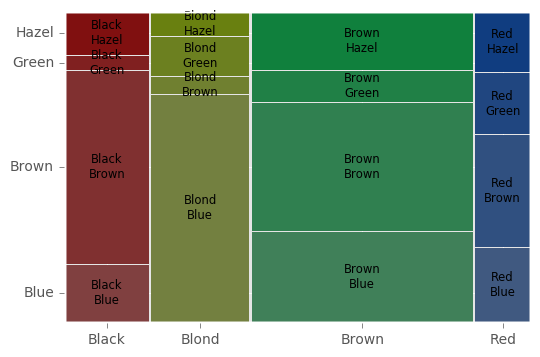

In [20]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(HEC2['Freq'])

# See here for some discussion on why this is needed https://github.com/statsmodels/statsmodels/issues/2190

### Problem 2: Sunspots revisited

Grading criteria: correctness of code and results.

Let `sunspots` be the sunactivity dataframe (defined below for you).

In [21]:
from statsmodels import datasets 
sunspots = datasets.sunspots.load_pandas().data.set_index("YEAR")

2a. For how many years was the activity $\geq 100$?

In [22]:
sunspots[sunspots.SUNACTIVITY>100].size

43

2b. Make a histogram plot of all activity from 1900 to the end of the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7e0e52b90>]], dtype=object)

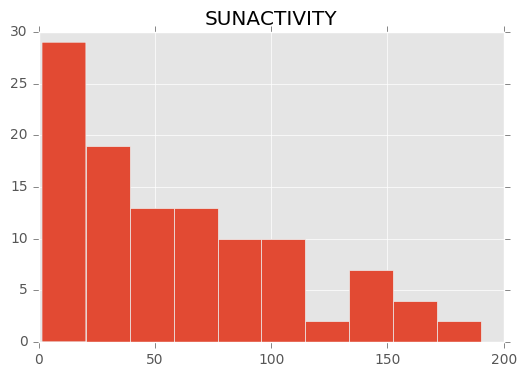

In [23]:
sunspots[sunspots.index>=1900].hist()

2c. Which year(s) had the highest activity?

In [24]:
sunspots[sunspots.SUNACTIVITY>190]

,SUNACTIVITY
YEAR,
1957.0,190.2


### Problem 3: Pivot tables

Grading criteria: correctness of code and explanations.

3a. Load the "mpg" R dataset from the Python ggplot library into the variable `mpg`.

In [25]:
from ggplot import mpg
mpg.head()

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/ext/sage/sage-8.1/local/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


3b. Using the pandas `pivot_table` command, cretae a pandas DataFrame that tells you the average "cty" and "hwy" (city and highway miles per gallon) for each manufacturer.

In [27]:
pivoted=pd.pivot_table(mpg, values=['cty', 'hwy'], index='manufacturer')
pivoted

,cty,hwy
manufacturer,,
audi,17.611111,26.444444
chevrolet,15.000000,21.894737
dodge,13.135135,17.945946
ford,14.000000,19.360000
honda,24.444444,32.555556
hyundai,18.642857,26.857143
jeep,13.500000,17.625000
land rover,11.500000,16.500000
lincoln,11.333333,17.000000


3c. Has the average city mileage improved from 1999 to 2008?   Has the average highway mileage improved from 1999 to 2008?

In [28]:
pivoted2=pd.pivot_table(mpg, values=['cty', 'hwy'], index='year')
pivoted2

,cty,hwy
year,,
1999,17.017094,23.427350
2008,16.700855,23.452991


3d. Create a scatterplot of pairs (displ, hwy) for all cars in 1999, and another for all cars in 2008.

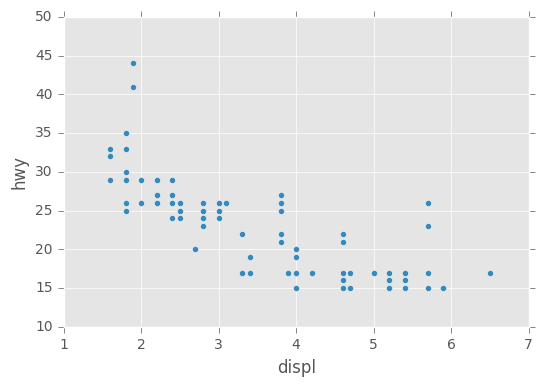

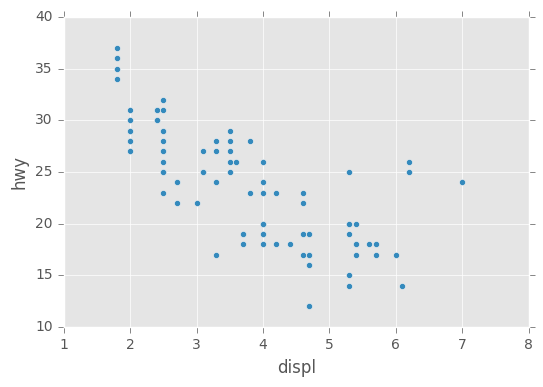

In [29]:
mpg[mpg.year==1999].plot.scatter('displ', 'hwy')
mpg[mpg.year==2008].plot.scatter('displ', 'hwy')

3e. What effect does increasing displacement have on highway gas mileage?

Greater displacement tends to make highway gas mileage worse.

### Problem 4: Irises

Grading criteria: correctness of code and explanations.

The [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a famous example used in statistics education.

4a. Load the iris dataset into a pandas DataFrame and use the `describe` command to see some basic statistics.

In [61]:
iris = sns.load_dataset('iris')
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


4b. Plot all of the sepal (length, width) pairs in a scatterplot, and the petal (length, width) pairs in another scatterplot.

In [62]:
iris.plot.scatter('sepal_length', 'sepal_width')
iris.plot.scatter('petal_length', 'petal_width')

4c. Compute the average petal width for each of the "species"-categories.

In [63]:
pd.pivot_table(iris, values=['petal_width'], index='species')

,petal_width
species,
setosa,0.246
versicolor,1.326
virginica,2.026


### Problem 5: Machine learning with irises

Grading criteria: correctness and relevance of code.

5a. The Wikipedia article on the iris dataset asserts:
> The use of this data set in cluster analysis however is not common, since the data set only contains two clusters with rather obvious separation.

Demonstrate this by performing a clustering computation and showing that it fails to separate the three species.

In [35]:
%%R
library(cluster)
set.seed(1)
isGoodCol <- function(col){
   sum(is.na(col)) == 0 && is.numeric(col) 
}
goodCols <- sapply(iris, isGoodCol)
clusters <- kmeans(iris[,goodCols], centers=3)
labels <- clusters$cluster

In [36]:
%%R
iris2d <- prcomp(iris[,goodCols], center=TRUE)
twoColumns <- iris2d$x[,1:2]
clusplot(twoColumns, labels)

5b. Use the [scikit-learn SVM classifier](http://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation) to classify species. Use a random sample of 80% of the initial data for training and the other 20% for testing, and report the accuracy rate of your predictions.

In [38]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [52]:
iris_array=iris.as_matrix(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']) # Converting to numpy array
np.random.shuffle(iris_array) # Randomizing the rows
iris_data=iris_array[:,:4] # Data is the first 4 columns
iris_target=iris_array[:, [4]] # Trying to guess the last column

In [53]:
clf.fit(iris_data[:120], iris_target[:120]) # Use the first 80% of the randomized data to train
pre = clf.predict(iris_data[120:]) # Use the model to predict the last 20% 
ans = iris_target[120:]

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
len([i for i in range(30) if pre[i] == ans[i]]) # Compare the predictions to the answers, all correct!

30